## Statistical programming

In [4]:
import numpy as np

population = np.random.randint(0,80,25000) # for example, district with a population of 25.000 people
population[0:10] # will do age estimate

array([31, 50,  7, 22, 74, 36, 61, 34, 77, 33])

In [5]:
np.random.seed(10) # seed func prevents random number from repeating

In [8]:
np.random.seed(115)
sample = np.random.choice(a = population, size = 100)
sample.mean() # the average age of 25.000 people in the district is 44.

44.44

In [9]:
population.mean()

39.81484

### descriptive statistic sample

In [10]:
import seaborn as sns
import researchpy as rp

tips = sns.load_dataset("tips")
df = tips.copy()

df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [11]:
rp.summary_cont(df[["total_bill", "tip", "size"]])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,total_bill,244.0,19.7859,8.9024,0.5699,18.6633,20.9086
1,tip,244.0,2.9983,1.3836,0.0886,2.8238,3.1728
2,size,244.0,2.5697,0.9511,0.0609,2.4497,2.6896


In [13]:
rp.summary_cat(df[["sex", "smoker", "day"]])

,Variable,Outcome,Count,Percent
0,sex,Male,157,64.34
1,,Female,87,35.66
2,smoker,No,151,61.89
3,,Yes,93,38.11
4,day,Sat,87,35.66
5,,Sun,76,31.15
6,,Thur,62,25.41
7,,Fri,19,7.79


In [14]:
# information about covaryans:
# cov = measure of variablitiy in the reliationship between two variables 

df[["tip", "total_bill"]].cov()

,tip,total_bill
tip,1.914455,8.323502
total_bill,8.323502,79.252939


In [15]:
df[["tip", "total_bill"]].corr()
# corr: correlation, A measure of  whether the relationship between two variables is significant or not

,tip,total_bill
tip,1.000000,0.675734
total_bill,0.675734,1.000000


### Confidence interval

In [16]:
# to calculate confidence interval

# step 1: find to 'n' value, average and standart deviation (n = 100, average = 180, sd = 40)
# step 2: decided to confidence interval, 95 or 99?
# step 3: calculate the confidence interval using the values above (look to formula from the internet)

In [5]:
prices = np.random.randint(10,110,1000)
prices.mean()

59.731

In [6]:
import statsmodels.stats.api as sms

average = sms.DescrStatsW(prices).zconfint_mean()
average # Numbers 57 and 61 have %95 reliability 

(57.93958644099611, 61.522413559003894)

### Bernoulli distribution

In [7]:
# using for two result situation like pass-fail and positive-negative that is a discrete probability distribution.

In [9]:
from scipy.stats import bernoulli 

p = 0.6 # heads or tails (know tail value: 0.6)
ru = bernoulli(p)
a = ru.pmf(k = 0) #probability mass function
print(a)

0.4


### Law of large numbers

In [10]:
# Probability term that describes the long-term stability of a random variable.

In [11]:
rng = np.random.RandomState(123) # RandomState is to immobilize random numbers
for i in np.arange(1,21):
    test_number = 2 ** i
    heads_tails = rng.randint(0,2, size = test_number)
    tails_probability = np.mean(heads_tails)
    print(f"number of shots: {test_number} --- probability of tails %.2f" % (tails_probability))

number of shots: 2 --- probability of tails 0.50
number of shots: 4 --- probability of tails 0.00
number of shots: 8 --- probability of tails 0.62
number of shots: 16 --- probability of tails 0.44
number of shots: 32 --- probability of tails 0.47
number of shots: 64 --- probability of tails 0.56
number of shots: 128 --- probability of tails 0.51
number of shots: 256 --- probability of tails 0.53
number of shots: 512 --- probability of tails 0.53
number of shots: 1024 --- probability of tails 0.50
number of shots: 2048 --- probability of tails 0.49
number of shots: 4096 --- probability of tails 0.49
number of shots: 8192 --- probability of tails 0.50
number of shots: 16384 --- probability of tails 0.50
number of shots: 32768 --- probability of tails 0.50
number of shots: 65536 --- probability of tails 0.50
number of shots: 131072 --- probability of tails 0.50
number of shots: 262144 --- probability of tails 0.50
number of shots: 524288 --- probability of tails 0.50
number of shots: 1048

### Binomial distribution

In [12]:
# Probability of success k after n independent trials

In [13]:
from scipy.stats import binom

p = 0.01
n = 100

ru = binom(n,p)
print(ru.pmf(1))

0.36972963764972666


In [14]:
print(ru.pmf(5))

0.002897787123761478


In [15]:
print(ru.pmf(10))

7.006035693977194e-08


### Poisson distribution

In [16]:
# Probabilities of rare events in a given area over a given time period

In [19]:
from scipy.stats import poisson

lambda_ = 0.1
rv = poisson(mu = lambda_)
a = rv.pmf(k=0)
a2 = rv.pmf(k=3)
a3 = rv.pmf(k=5)
print(f"""
zero probability of fault: {a}
three probability of fault: {a2}
five probability of fault: {a3}""")


zero probability of fault: 0.9048374180359595
three probability of fault: 0.00015080623633932676
five probability of fault: 7.54031181696634e-08


### Normal distribution

In [20]:
# Probability calculation for continuous random variables known to be normally distributed

In [21]:
from scipy.stats import norm

norm.cdf(90,80,5)

0.9772498680518208

In [22]:
norm.cdf(70,80,5)

0.022750131948179195

In [23]:
norm.cdf(73,80,5)

0.08075665923377107

In [24]:
norm.cdf(90,80,5) - norm.cdf(85,80,5)

0.13590512198327787

### Hypothesis testing and p-value

In [1]:
# Hypothesis Testing: this is a statistical technical to testing a guess.
# p-value: Computer give p-value to evaluate results of hypothesis tests.So, if p-value small than 0.05, we reject H0 hypothesis.

In [2]:
# Hypothesis testing steps:
# step 1: set hypotheses and determine directions
# step 2: determination of significance level and table value
# step 3: determining the test statistic and calculating the test statistic
# step 4: explanation of the calculated test statistic and the table value corresponding to alpha

In [3]:
import numpy as np

measur = np.array([25, 161, 21, 234, 241, 123, 54, 32, 34, 131, 233, 41, 96, 56, 47, 15, 75, 83]) # the measurment values sent to us
measur[0:10]

array([ 25, 161,  21, 234, 241, 123,  54,  32,  34, 131])

In [4]:
import scipy.stats as stats
stats.describe(measur)

DescribeResult(nobs=18, minmax=(15, 241), mean=94.55555555555556, variance=5855.67320261438, skewness=0.9146926848072372, kurtosis=-0.5165223841379825)

### Assumptions

#### Normality assumption:

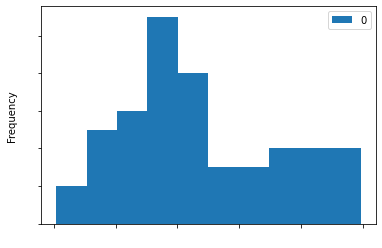

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

rng = np.random.RandomState(123)
df = rng.randint(0,250,50)
stat = stats.describe(df)
hist = pd.DataFrame(df).plot.hist()
plt.xticks(color="white");
plt.yticks(color="white");
plt.show()

#### shapiro - wilks test:

In [9]:
from scipy.stats import shapiro

shapiro(df)

# we will observe whether we reject the hypothesis by looking at the p-value here.
# If the p-value is less than 0.05, we reject it, otherwise we do not reject it.

ShapiroResult(statistic=0.9492357969284058, pvalue=0.0317385159432888)

#### applying hypothesis test

In [11]:
hyp_test = stats.ttest_1samp(df, popmean=170) # popmean: population mean, so the measurement value give to us. 
hyp_test

Ttest_1sampResult(statistic=-5.845957456127138, pvalue=4.038689535237669e-07)

#### nonparametic single sample test

In [14]:
# the meaning of parametric test, when provide various assumptions, can apply test.

from statsmodels.stats.descriptivestats import sign_test

sign = sign_test(df, 170)
sign

(-12.0, 0.000936222910851825)

#### single sample proportion test

In [17]:
# it is used when you want to test a proportional expression.

from statsmodels.stats.proportion import proportions_ztest

count = 102
obs = 1000
value = 0.125
proport = proportions_ztest(count, obs, value)
proport

(-2.4031981544375656, 0.016252378088608403)

#### independent two sample T test (AB test)

In [18]:
# It is used when you want to make a comparison between two group averages.

A = pd.DataFrame([30,27,21,27,30,29,30,20,15,24,42,52,11,20])
B = pd.DataFrame([12,32,51,32,51,32,64,71,33,41,21,12,16,17])

A_B = pd.concat([A,B], axis = 1)
A_B.columns = ["A", "B"]
A_B # data type give to us.

,A,B
0,30,12
1,27,32
2,21,51
3,27,32
4,30,51
5,29,32
6,30,64
7,20,71
8,15,33
9,24,41


In [27]:
A = pd.DataFrame([30,27,21,27,30,29,30,20,15,24,42,52,11,20])
B = pd.DataFrame([12,32,51,32,51,32,64,71,33,41,21,12,16,17])

# A and group of A

group_A = np.arange(len(A))
group_A = pd.DataFrame(group_A)
group_A[:] = "A"
A = pd.concat([A, group_A],axis = 1)

# B and group of B

group_B = np.arange(len(B))
group_B = pd.DataFrame(group_B)
group_B[:] = "B"
B = pd.concat([B, group_B], axis = 1)

# all data

AB = pd.concat([A,B], ignore_index = True)
AB.columns = ["income", "source"]

In [28]:
AB

,income,source
0,30,A
1,27,A
2,21,A
3,27,A
4,30,A
5,29,A
6,30,A
7,20,A
8,15,A
9,24,A


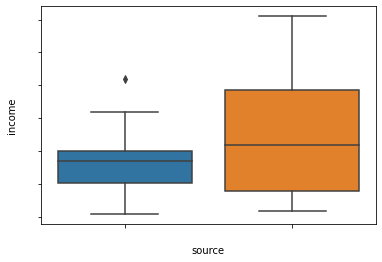

In [29]:
import seaborn as sns

sns.boxplot(x= "source", y = "income", data = AB)
plt.xticks(color="white");
plt.yticks(color="white");
plt.show()

### Normality Assumption

In [31]:
from scipy.stats import shapiro

shapiro(A_B.A)

ShapiroResult(statistic=0.9218422174453735, pvalue=0.23371048271656036)

In [32]:
shapiro(A_B.B)

ShapiroResult(statistic=0.9226486682891846, pvalue=0.24001237750053406)

In [33]:
# assumption of homogeneity of variance

stats.levene(A_B.A, A_B.B)

LeveneResult(statistic=3.5744985271426573, pvalue=0.06986762968090976)

In [34]:
# hypothesis test:

stats.ttest_ind(A_B["A"], A_B["B"], equal_var=True)

Ttest_indResult(statistic=-1.3226324113580488, pvalue=0.1974742540166383)